In [ ]:
!pip install ultralytics==8.0.196
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="cTo3NAru0gydx39QbYct")  # Replace with your actual API key
project = rf.workspace("vitif246x").project("ponkan-synthetic-no-overlay-sg1kz")
version = project.version(1)  # Use the correct version
# Download the dataset in YOLO format
dataset = version.download("yolov8")
dataset_path = dataset.location


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ponkan-synthetic-no-overlay-1 in yolov8:: 100%|██████████| 4042/4042 [00:04<00:00, 985.81it/s]


In [ ]:
from ultralytics import YOLO
import os
import numpy as np
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="cTo3NAru0gydx39QbYct")
project = rf.workspace("vitif246x").project("ponkan-synthetic-no-overlay-sg1kz")
version = project.version(1)

# Download the dataset in YOLO format
dataset = version.download("yolov8")
dataset_path = dataset.location

# Define the path to your data.yaml file
data_yaml_path = os.path.join(dataset_path, 'data.yaml')

# Initialize and train YOLOv8 model
model = YOLO('yolov8n.yaml')

# Load the dataset
dataset = model.get_dataset(data=data_yaml_path)

# Modify the __getitem__ method in the dataset class to return labels as scalars
class CustomDataset(dataset.__class__):
    def __getitem__(self, index):
        data = super().__getitem__(index)
        # Assuming data['labels'] is a NumPy array with shape (n, 5) [xmin, ymin, xmax, ymax, class_id]
        data['labels'][:, 4] = data['labels'][:, 4].astype(int)  # Ensure class IDs are integers
        return data

# Create an instance of the custom dataset
custom_dataset = CustomDataset(dataset.location)

# Train the model using the custom dataset
model.train(data=custom_dataset, epochs=5, imgsz=640)

loading Roboflow workspace...
loading Roboflow project...



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

AttributeError: 'YOLO' object has no attribute 'get_dataset'

In [ ]:
from ultralytics import YOLO
import os

# Define the path to your data.yaml file
data_yaml_path = os.path.join(dataset_path, 'data.yaml')

# Initialize and train YOLOv8 model
model = YOLO('yolov8n.yaml')  # Use 'yolov8n.yaml' or other configurations as needed
model.train(data=data_yaml_path, epochs=5, imgsz=640)



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

NameError: name 'yaml' is not defined

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # Make sure to specify the correct path to the weights

# Test the model on a sample image
# Test the model on a sample image
results = model.predict('/content/runs/detect/train2/YOUR_IMAGE.jpeg')  # Replace with the path to your test image

# Iterate through the results and display each prediction
for result in results:
    result.plot()  # This method displays the predictions directly



image 1/1 /content/runs/detect/train2/YOUR_IMAGE.jpeg: 640x640 21 0s, 293.8ms
Speed: 4.5ms preprocess, 293.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /content/runs/detect/train2/YOUR_IMAGE.jpeg: 640x640 21 0s, 999.1ms
Speed: 20.8ms preprocess, 999.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


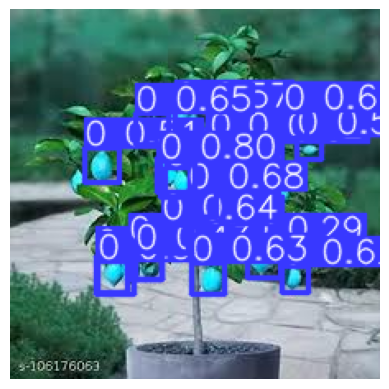

Number of oranges detected: 21


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # Ensure the correct path to the weights

# Test the model on a sample image
results = model.predict('/content/runs/detect/train2/YOUR_IMAGE.jpeg')  # Replace with the path to your test image

# Iterate over the results and process each prediction
for result in results:
    # Assuming '0' is the class index for oranges, you may need to change this
    orange_count = (result.boxes.cls == 0).sum()  # Counting class '0' (oranges)

    # Display the image with predictions (bounding boxes)
    result_image = result.plot()  # This returns the image with bounding boxes

    # Show the result image using matplotlib
    plt.imshow(result_image)
    plt.axis('off')  # Hide the axis
    plt.show()

    # Print the count of oranges
    print(f"Number of oranges detected: {orange_count}")
